# 词袋模型简介

词袋模型：将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇。简单来说，词袋可以帮助计算词频。

# 【课程】英文语料的词袋模型思路

In [1]:
# 导入推特数据
import pandas as pd
text_ana = pd.read_csv('/Users/yangmi/Documents/text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


## 英文数据预处理

对于英文推特文本数据，预处理比较重要的是转换大小写、时态等，以及文本数据预处理中比较重要的移除url链接、特殊字符、停用词等此类对研究无意义或存在干扰的文本。英文文本的处理需要使用英文相关工具，例如本课程中根据nltk中的停用词词表来删除数据当中的停用词。当研究者存在明确的停用词范围时也可以自定义停用词词表。

In [2]:
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

#定义一下预处理
def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)
    # 移除特殊符号
    text = re.sub('[^A-Z^a-z^0-9^ ]', '', text)
    # 删除停用词
    text = [word for word in text.split() if word.lower() not in stopwords_list]
    return text

In [3]:
# 应用预处理并提取前1000个数据以便演示（数据过大也会报错）
text_ana['text'][:1000] = text_ana['text'][:1000].apply(preprocess_text)

/var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/ipykernel_40033/1881492571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_ana['text'][:1000] = text_ana['text'][:1000].apply(preprocess_text)


In [4]:
#改变数据为词袋模型可以处理的格式
text = text_ana['text'][:1000].map(' '.join)

In [5]:
text

0      republicans trying steal health care 22 millio...
1      rt kylegriffin1 rep mark veasay introduced bil...
2      top us science office went dark tonight good s...
3      fundraising quarter ends hour mo would really ...
4          rt larrykudlow important story sentedcruz nro
                             ...                        
995    even tho ripped judges mannypacquiao fight w c...
996    wrote nytmags annotated constitution print us ...
997    acosta saddest day montana voters elected guy ...
998    rt acosta cnn response sad day president unite...
999    looking get fireworks fix fourth heres great o...
Name: text, Length: 1000, dtype: object

## 构建词袋模型

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

print('词袋特征矩阵的形状', X.shape)
print('特征词列表', vectorizer.get_feature_names_out())

词袋特征矩阵的形状 (1000, 4741)
特征词列表 ['04' '10' '100' ... 'zika' 'zoe' 'zoo']


In [7]:
#.toarray()方法将稀疏矩阵转换为密集矩阵，list()将将数组转换为列表形式。
list(X.toarray())

[array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

## 词频统计

In [8]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [9]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('rt', 286),
 ('amp', 171),
 ('qt', 154),
 ('realdonaldtrump', 88),
 ('great', 66),
 ('health', 58),
 ('care', 57),
 ('today', 53),
 ('us', 48),
 ('people', 46),
 ('trump', 46),
 ('bill', 45),
 ('trumpcare', 44),
 ('would', 40),
 ('must', 39),
 ('happy', 38),
 ('day', 36),
 ('new', 36),
 ('voter', 36),
 ('get', 34),
 ('gop', 33),
 ('president', 32),
 ('potus', 31),
 ('see', 30),
 ('act', 28),
 ('congress', 28),
 ('july', 28),
 ('need', 28),
 ('one', 28),
 ('rights', 27),
 ('americans', 26),
 ('healthcare', 26),
 ('medicaid', 26),
 ('years', 25),
 ('fight', 24),
 ('work', 24),
 ('america', 23),
 ('bensasse', 23),
 ('fraudnewscnn', 23),
 ('office', 23),
 ('states', 23),
 ('thanks', 23),
 ('weekend', 23),
 ('fnn', 22),
 ('take', 22),
 ('trumps', 22),
 ('4th', 21),
 ('good', 21),
 ('join', 21),
 ('make', 21),
 ('media', 21),
 ('senate', 21),
 ('state', 21),
 ('vote', 21),
 ('bad', 20),
 ('commission', 20),
 ('country', 20),
 ('house', 20),
 ('thank', 20),
 ('violence', 20),
 ('want', 20),

## 词云图绘制

根据已有的词袋模型结果，可以将其中的词频统计结果提取出来，然后将每个词出现的频率可视化为一个词云图，词云图的形状、尺寸、颜色、词数等等都可以自定义。

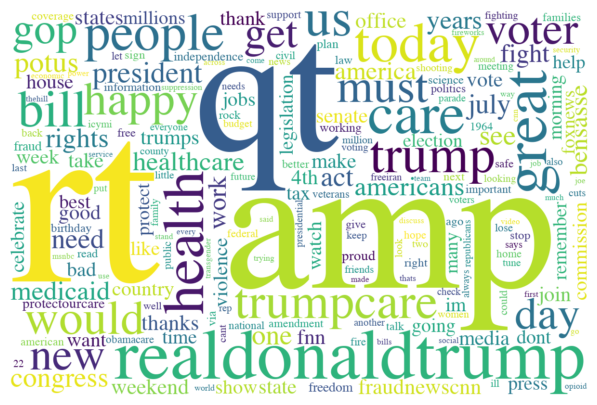

<Figure size 640x480 with 0 Axes>

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='Times.ttc'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

# 【课程】中文语料的词袋模型思路

In [11]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('/Users/yangmi/Documents/text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [12]:
# 分析语料
text = list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

## 中文预处理

In [13]:
#使用jieba分词
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/jieba.cache
Loading model cost 0.292 seconds.
Prefix dict has been built successfully.


0    # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...
1                                                 转发 C
2    【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...
3    丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...
4        诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！
Name: 标题/微博内容, dtype: object

In [14]:
text = list(text_ana['标题/微博内容'].dropna())
text

['# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言 自 在 人心   \u200b \u200b',
 '转发 C',
 '【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能 唱 跳 不 设限 ， 运动 联 濛 开 新年 🇨 🇳   期待 全能 音乐 人 @ 刘雨昕   与 # 运动 者 联 濛 # 一起 ， 为 冬奥 赛事 助力 加油 ！ 】',
 '丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程鑫   二十 成金筑梦鑫 世界 #   大年初一 锁定 @ 北京 卫视   和 门面 主舞 @ 时代 少年 团 - 丁程鑫   一起 过大年 ， 拥抱 冰雪 ， 致敬 冬奥 ！',
 '诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！',
 '转发 C',
 '# 熊猫 守护者 ## 全面 二 创冰墩 墩 # 北京 冬奥会 如火如荼 地 进行 中 ， 滚滚 我 的 好 朋友 冰墩 墩 也 十分 活跃 ， 看 滚滚 我 做 一组 舒展 运动 ， 为 中国 健儿 加油 鼓 劲儿 ！ [ 嘻嘻 ] [ 嘻嘻 ]   http : / / t . cn / A6ilerDZ   视频 来源 ： @ 桃花源 生态 保护 基金会   \u200b \u200b \u200b',
 '转发 C',
 '2022 北京 冬奥会 加油 ！ 冰墩 墩 雪容融 也 非常 可爱 ！ 期待 我国 奥运健儿 们 的 精彩 表现 [ 开学 季 ] # 云 支教 迎 冬奥 #   \u200b \u200b',
 '和 @ TFBOYS - 易 烊 千玺   一起 助力 东奥 ！ 一起 向 未来 ！',
 '转发 C',
 '[ 心 ]',
 '守护 [ 心 ]',
 '# 易 烊 千玺 邀 你 唱响 一起 向 未来 #   / / @ M28 号 星球 : # 易 烊 千玺 邀 你 唱响 一起 向 未来 #   26.17',
 '/ / @ 翔霖 神谕 : 感谢 @ 爱奇艺   的 分享 。 新年 胜 旧年 ， 春妍 惹 绚烂 ， 万事 胜意 与 平安 喜乐 的 祝福 徒增 和 乐 ， @ 时代 少年 团 - 严浩翔   @ 

## 构建词袋模型

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 602)


In [16]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [17]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 词频统计

In [18]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [19]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

602

In [20]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

## 词云图绘制

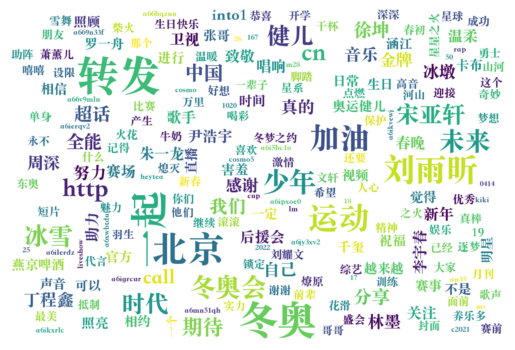

In [21]:
# 根据词袋模型分析结果绘制词云图

wordcloud = WordCloud(
    font_path='Songti.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 【实战】2023年春节档电影热点

接下来，使用2023年春节档电影微博话题下的数据构建词袋模型，将结果可视化为词云图，探讨微博用户对春节档电影的讨论热点。

## 微博数据预处理

In [22]:
#导入数据
import pandas as pd
cnyfilm_com = pd.read_excel('/Users/yangmi/Documents/WeiboHotListDataSet/comments/2023春节档已官宣五部电影/2023春节档已官宣五部电影_cmtMmzbNoJsa.xlsx')

In [23]:
cnyfilm_com

,评论id,发布时间,用户id,用户昵称,用户城市,点赞数,回复数,评论内容
0,4853785270164076,Tue Jan 03 11:20:50 +0800 2023,2364148433,在希望的田野上偷菜,海外 丹麦,1520,1,图片评论
1,4853786755477039,Tue Jan 03 11:26:44 +0800 2023,1844014613,北城耶啵_,其他,1407,0,准备好了
2,4853786713261544,Tue Jan 03 11:26:34 +0800 2023,1844014613,北城耶啵_,其他,1168,1,大年初一看无名
3,4853785342253294,Tue Jan 03 11:21:07 +0800 2023,5322590909,萱草花_85,其他,1050,0,大年初一看《无名》
4,4853785262297883,Tue Jan 03 11:20:48 +0800 2023,7729870215,逃跑新娘yb,其他,871,0,大年初一看无名耶
...,...,...,...,...,...,...,...,...
488,4854270492676389,Wed Jan 04 19:28:56 +0800 2023,7566448554,Lucky-Uhdndmfm,其他,0,0,噗…吹
489,4854239249832029,Wed Jan 04 17:24:47 +0800 2023,7344758594,低调的我1171,海外,1,0,啊啊啊啊啊春节看无名[报税]
490,4854208941263228,Wed Jan 04 15:24:21 +0800 2023,7750710086,iu1七,其他,0,0,准备好了，大年初一，不见不散
491,4854205397338608,Wed Jan 04 15:10:16 +0800 2023,6998523346,李白爱吃螺蛳粉,河南 商丘,0,0,发面馒头


微博预处理的注意事项：由于微博文本内容中可能包含各种标点符号、特殊字符、emoji、url链接等，这些文本与分析主题无关，并且可能会对分析造成干扰，所以应该删除。而微博文本数据一般是进行中文文本分析，所以也要删除一些中文中的停用词，使用中文分词工具进行分词

In [25]:
# 对数据进行预处理
import jieba
import re

#对微博内容进行清洗，去除标点符号、特殊字符、表情等
def clean_text(text):
    text = re.sub(r'[^\u4e00-\u9fa5]+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[^\w\s]','',text)
    text = re.sub('\s+',' ',text)
    return text

In [26]:
cnyfilm_com["评论内容"] = cnyfilm_com["评论内容"].apply(clean_text)

In [27]:
# 读取停用词列表
stopword_zh = [k.strip() for k in open('stopwords.txt', encoding='utf8').readlines() if k.strip() != '']

# 删除停用词，使用jieba进行分词
def preprocess_text(text):
    words = jieba.cut(text)
    words = [word for word in words if word not in stopword_zh]
    return words

In [28]:
cnyfilm_com["评论内容"] = cnyfilm_com["评论内容"].apply(preprocess_text)

In [29]:
#转换格式以便构建词袋模型，否则将会因为数据格式问题报错
text = cnyfilm_com["评论内容"].map(' '.join)
text

0             图片 评论
1                 好
2           大年初一 无名
3           大年初一 无名
4         大年初一 无名 耶
           ...     
488             噗 吹
489    啊啊啊 春节 无名 报税
490     好 大年初一 不见不散
491           发面 馒头
492             太棒了
Name: 评论内容, Length: 493, dtype: object

## 构建词袋模型

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

In [31]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 词频统计

In [32]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [33]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

379

In [34]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('无名', 344),
 ('大年初一', 156),
 ('王一博', 83),
 ('期待', 64),
 ('电影', 54),
 ('春节', 23),
 ('不见不散', 21),
 ('五部', 19),
 ('大卖', 19),
 ('官宣', 19),
 ('一博王', 16),
 ('谍战', 16),
 ('定档', 15),
 ('悬疑', 13),
 ('梁朝伟', 12),
 ('喜欢', 11),
 ('一博', 9),
 ('程耳', 9),
 ('叶秘', 8),
 ('大片', 8),
 ('导演', 8),
 ('影院', 8),
 ('电影院', 8),
 ('阵容', 8),
 ('大麦', 7),
 ('巨制', 7),
 ('王一博王', 7),
 ('一个', 6),
 ('主演', 6),
 ('初一', 6),
 ('别人', 6),
 ('博爱', 6),
 ('快乐', 6),
 ('神秘', 6),
 ('哈哈哈', 5),
 ('喜乐', 5),
 ('平安', 5),
 ('影帝', 5),
 ('微博', 5),
 ('我要', 5),
 ('票房', 5),
 ('转发', 5),
 ('一张', 4),
 ('三部曲', 4),
 ('不染', 4),
 ('仙客', 4),
 ('似山眼', 4),
 ('信心', 4),
 ('倾力', 4),
 ('凡裳', 4),
 ('可爱', 4),
 ('吃饭', 4),
 ('啊啊啊', 4),
 ('图片', 4),
 ('坐近', 4),
 ('多时', 4),
 ('好看', 4),
 ('必看', 4),
 ('打造', 4),
 ('拥星', 4),
 ('期盼', 4),
 ('比心', 4),
 ('烟火', 4),
 ('王一博喜', 4),
 ('皮囊', 4),
 ('眉秀', 4),
 ('看谍', 4),
 ('笑笑', 4),
 ('纸屑', 4),
 ('行程', 4),
 ('评论', 4),
 ('超强', 4),
 ('遇见', 4),
 ('风尘', 4),
 ('食尽', 4),
 ('鬼才', 4),
 ('世上', 3),
 ('世界', 3),
 ('好好', 3),
 ('守护', 3),
 ('影后'

## 词云图绘制

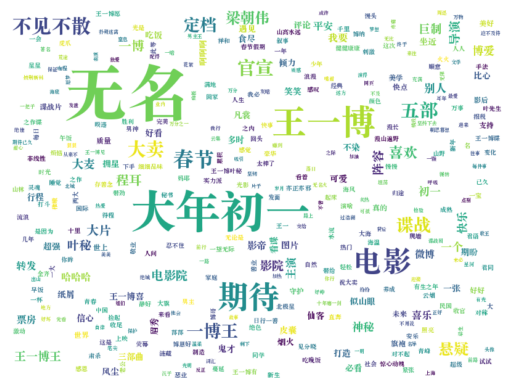

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='Songti.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=800,
    height=600,
    max_words=370,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

词频/词云图表明，比较热门的讨论词为：无名、大年初一、王一博、期待。无名为一部2023年春节档电影，由王一博主演。词频/词云图结果表明用户对2023年春节档电影的关注点主要集中于演员，演员的知名度使得这部电影获得较高的讨论度与积极的情感反馈（期待）。